# 深度学习基础

## 1.从零开始训练 猫狗识别 模型

## 数据集准备

![tree.png](images/tree.png)

In [1]:
import os, shutil

# 下载 dogs-vs-cats 数据集并解压 train.zip
original_dataset_dir = 'dogs-vs-cats/train/'

# 设置数据集各级目录名称
base_dir = 'data'
data_dirs = ['train', 'validation', 'test']
class_dirs = ['cat', 'dog']

# 分别设置训练、验证和测试数据集的图像文件区间
images = {
    'train': [0, 1000],
    'validation': [1000, 1500],
    'test': [1500, 2000],
}

for d in data_dirs:
    for c in class_dirs:
        # 构造数据集目录，格式示例：'data/train/dog/'
        dataset_dir = f"{base_dir}/{d}/{c}/"
        os.makedirs(dataset_dir, exist_ok=True)
        # 构造图像文件名称，格式示例：'cat.1.jpg'
        fnames = [f'{c}.{i}.jpg' for i in range(images[d][0], images[d][1])]
        # 将挑选的图像文件拷贝到对应的数据集目录下
        for fname in fnames:
            shutil.copyfile(original_dataset_dir+fname, dataset_dir+fname)

## 模型构建

![model.png](images/model.png)


In [3]:
from keras import models, layers, optimizers

model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 

model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [35]:
# 模型可视化
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## 模型编译

In [5]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 数据预处理

(1) 读取图像文件。

(2) 将 JPEG 文件解码为 RGB 像素网格。

(3) 将这些像素网格转换为浮点数张量。

(4) 将像素值(0~255 范围内)缩放到 [0, 1] 区间。

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# 使用 ImageDataGenerator 从目录中读取图像
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 创建训练集数据生成器，猫和狗各1000张
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# 创建验证集数据生成器，猫和狗各500张
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print(f'data_batch.shape:{data_batch.shape}')
    print(f'labels_batch.shape:{labels_batch.shape}')
    break

data_batch.shape:(20, 150, 150, 3)
labels_batch.shape:(20,)


## 模型训练

In [25]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=30,
                              validation_data=test_generator,
                              validation_steps=50)

Epoch 1/30
50/50 [==============================] - 32s 649ms/step - loss: 0.6435 - acc: 0.6330 - val_loss: 0.6443 - val_acc: 0.6430
Epoch 2/30
50/50 [==============================] - 33s 666ms/step - loss: 0.6124 - acc: 0.6560 - val_loss: 0.6466 - val_acc: 0.5970
Epoch 3/30
50/50 [==============================] - 35s 699ms/step - loss: 0.6025 - acc: 0.6740 - val_loss: 0.6502 - val_acc: 0.5970
Epoch 4/30
50/50 [==============================] - 35s 707ms/step - loss: 0.5903 - acc: 0.6920 - val_loss: 0.6044 - val_acc: 0.6730
Epoch 5/30
50/50 [==============================] - 35s 708ms/step - loss: 0.5818 - acc: 0.6880 - val_loss: 0.5960 - val_acc: 0.6760
Epoch 6/30
50/50 [==============================] - 36s 726ms/step - loss: 0.5609 - acc: 0.7080 - val_loss: 0.5854 - val_acc: 0.6870
Epoch 7/30
50/50 [==============================] - 39s 782ms/step - loss: 0.5359 - acc: 0.7350 - val_loss: 0.6485 - val_acc: 0.6550
Epoch 8/30
50/50 [==============================] - 40s 809ms/step - 

## 模型保存

In [26]:
model.save('cats_and_dogs_small_1.h5')

## 模型评估

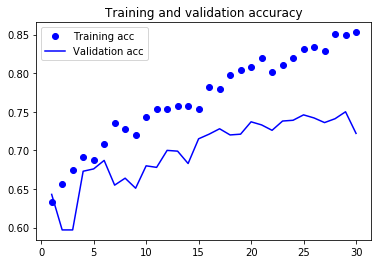

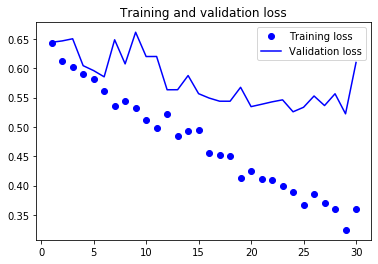

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()